In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso


In [2]:
# grab data -- change path for your own file
df1 = pd.read_csv("train3.csv")

# print first few rows -- could also use df.head()
print (df1.iloc[:3])
# and get summary stats on variables
print (df1.describe())

          x1         x2         x3         x0  x4         x5          x6  \
0  56.590866 -15.164974 -71.868156 -24952.783   1  29.327799  1122.86820   
1  10.907610 -42.359173  -8.457231 -24962.082   1  90.882484   960.58179   
2  34.974998  42.709808 -15.151949 -25028.438   0 -70.219116   986.54913   

          x7          x8            y  
0  -5.556481  122.028500  -74025800.0  
1 -17.387789  -65.950005 -167792768.0  
2  38.034069  -98.859238  136613888.0  
               x1          x2          x3            x0          x4  \
count  516.000000  516.000000  516.000000    516.000000  516.000000   
mean    51.736012   10.975219   11.932317 -25004.803167    0.525194   
std     28.423105   33.699373   39.577027     51.363376    0.499849   
min      0.081017  -81.257637 -134.974990 -25160.113000    0.000000   
25%     29.936390  -12.377698  -14.996227 -25039.551500    0.000000   
50%     51.267094   11.625733   13.688730 -25006.647500    1.000000   
75%     77.361137   31.714382   38.983

In [3]:
df2 = df1.dropna()
# and get summary stats on variables to check to see if any variables had missingness
print (df2.describe())

               x1          x2          x3            x0          x4  \
count  516.000000  516.000000  516.000000    516.000000  516.000000   
mean    51.736012   10.975219   11.932317 -25004.803167    0.525194   
std     28.423105   33.699373   39.577027     51.363376    0.499849   
min      0.081017  -81.257637 -134.974990 -25160.113000    0.000000   
25%     29.936390  -12.377698  -14.996227 -25039.551500    0.000000   
50%     51.267094   11.625733   13.688730 -25006.647500    1.000000   
75%     77.361137   31.714382   38.983266 -24969.142000    1.000000   
max     99.809120  114.399220  118.005890 -24807.332000    1.000000   

               x5           x6          x7          x8             y  
count  516.000000   516.000000  516.000000  516.000000  5.160000e+02  
mean    27.319595  1001.325193    9.448520   25.045274 -5.365632e+07  
std     80.863166    47.825841   25.628581   96.433169  1.621822e+08  
min    -87.764595   861.280940  -79.024902 -215.919830 -4.213926e+08  
25%  

In [4]:
# create set of variables to pass to PCA, x's only / exclude Y
vars = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
x = df2.loc[:, vars].values

# also create Y while we're at it for use later on in regressions
y = df2.loc[:, 'y'].values

In [5]:
# normalize x
x_norm = StandardScaler().fit_transform(x)

In [6]:
dim = 8
pca1 = PCA(n_components=dim)
# create n dimensional representation
latent_vars = pca1.fit_transform(x_norm)


In [7]:
print ("Variance explained by each latent variable in PCA: ", pca1.explained_variance_ratio_)
print ("\n")

for i in range(0,9):
    print ("x",i,": ", end='')
    for j in range(0,dim):
        print (round(pca1.components_[j][i],4), ", ", end='')
    print ("\n")

# clear from the component scores / variance explained by each dimension that x1,x2,x3 are loading on the first factor
# also possible that x4 and x5 are related

Variance explained by each latent variable in PCA:  [0.25896365 0.21282259 0.12417551 0.1163428  0.10375013 0.09874006
 0.05700854 0.01877002]


x 0 : 0.0425 , 0.0131 , -0.4741 , 0.5572 , 0.5263 , -0.4167 , 0.1092 , 0.009 , 

x 1 : 0.0173 , -0.0601 , 0.0796 , 0.7421 , -0.6584 , 0.0588 , -0.0416 , 0.0014 , 

x 2 : -0.5766 , -0.1159 , -0.0393 , 0.0383 , 0.0602 , -0.0326 , -0.4897 , -0.6376 , 

x 3 : -0.5091 , -0.0929 , -0.035 , -0.0657 , -0.141 , -0.07 , 0.8211 , -0.1651 , 

x 4 : -0.145 , 0.6847 , 0.0727 , 0.0295 , -0.0048 , -0.0627 , -0.027 , 0.0166 , 

x 5 : -0.1507 , 0.6833 , 0.0633 , 0.0389 , -0.0429 , -0.0542 , -0.0009 , 0.0208 , 

x 6 : 0.0327 , -0.1213 , 0.6446 , -0.0155 , 0.0065 , -0.7533 , -0.0276 , 0.0122 , 

x 7 : -0.597 , -0.1517 , -0.0311 , 0.0198 , 0.0322 , -0.0075 , -0.2311 , 0.7515 , 

x 8 : -0.0707 , -0.028 , 0.5834 , 0.3606 , 0.5129 , 0.4925 , 0.1323 , -0.0235 , 



In [8]:
# check x4 and x5 -- only keep x5 b/c it has more variance
np.corrcoef(df2['x4'], df2['x5'])

array([[1.        , 0.91423837],
       [0.91423837, 1.        ]])

In [9]:
# new pca focusing on 1 factor, just using x7,x2,x3
vars2 = ['x2', 'x3', 'x7']
temp = df2.loc[:, vars2].values
pca2 = PCA(n_components=1)

# create 1 dimensional representation
latent_vars = pca2.fit_transform(temp)

# check to see if I'm right
print ("Variance explained by each latent variable in PCA: ", pca2.explained_variance_ratio_)
print ("\n")

Variance explained by each latent variable in PCA:  [0.75074945]




In [10]:
print(temp[2])
df2['x1']

[ 42.709808 -15.151949  38.034069]


0      56.590866
1      10.907610
2      34.974998
3      99.809120
4      26.966738
         ...    
511    87.572922
512     0.204052
513    39.199738
514    48.779186
515    77.008270
Name: x1, Length: 516, dtype: float64

In [11]:
# create new dataframe with the latent variables from pca1
df2['pca1'] = latent_vars[:,0]
# add the latent variables to x_norm
x_norm = np.append(x_norm,latent_vars,1)


In [12]:
# y is huge; reduce
df2['y'] = df2['y']/1000

In [13]:
print(pca2.components_)
print(pca2.singular_values_)

[[-0.56664816 -0.69305938 -0.44562155]]
[1139.57793577]


In [14]:
IVs = ['x0', 'x1', 'x5', 'x6', 'x8', 'pca1']

# create train / test split using dataframe
x_train, x_test, y_train, y_test = train_test_split(df2.loc[:, IVs], df2.loc[:, 'y'], test_size=0.25, random_state=13)

# make sure results make sense
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


(387, 6) (387,)
(129, 6) (129,)


In [15]:
# try both linear and polynomial of different degrees
linear_model = LinearRegression(normalize=True)
p2_model = LinearRegression(normalize=True)
p3_model = LinearRegression(normalize=True)

# create polynomial features
p2_features = PolynomialFeatures(degree=2)
p2_train = p2_features.fit_transform(x_train)
p2_test = p2_features.fit_transform(x_test)

p3_features = PolynomialFeatures(degree=3)
p3_train = p3_features.fit_transform(x_train)
p3_test = p3_features.fit_transform(x_test)

# now do estimation of models
lin_1 = linear_model.fit(x_train, y_train)
p2_1 = p2_model.fit(p2_train, y_train)
p3_1 = p3_model.fit(p3_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

In [16]:
print(lin_1.coef_)

print(p2_1.coef_)
print(p2_1.intercept_)
p2_features.get_feature_names()

[ 2.52317969e-01  4.44402790e+00 -2.00688087e+03 -1.56112175e+02
 -9.63162596e+00 -1.83669692e+00]
[ 1.77066567e+17 -7.01545455e+01  6.79793587e+02  2.18066077e+03
  3.10579275e+02 -1.57074062e+02  5.99028193e+00 -1.31425445e-03
  2.57727370e-02  6.66971347e-03  3.49860706e-03 -7.07677695e-03
  1.53502432e-04 -6.09931957e-02 -2.65217721e-02 -2.95764351e-02
  4.45034888e-02  4.94422080e-02 -9.90855677e-03 -4.01596925e+00
  4.88640822e-03  5.98087775e-03 -1.09460274e-01 -2.21003401e-02
 -5.05066210e-03  1.37457467e-03  1.31429557e-03  5.71950523e-04]
-1.7706656687837818e+17


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x4^2',
 'x4 x5',
 'x5^2']

In [17]:
# predict values for test sets
lin1_predict = lin_1.predict(x_test)
p2_predict = p2_1.predict(p2_test)
p3_predict = p3_1.predict(p3_test)

[ 38719.7983378  109529.50031567 -28002.02115934 -77697.12504772
 106530.55153601  68089.23728347 -52943.11560141 -25943.35720998
 101476.45262714 137717.85191282]
151     52607.792
341     89044.552
29     -28404.036
0      -74025.800
504     94448.432
215     84948.224
58     -54579.260
71     -35814.480
65      87980.104
223    170827.376
Name: y, dtype: float64


151    13887.993662
341   -20484.948316
29      -402.014841
0       3671.325048
504   -12082.119536
215    16858.986717
58     -1636.144399
71     -9871.122790
65    -13496.348627
223    33109.524087
Name: y, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Text(0.5, 1.0, 'Histogram of errors')

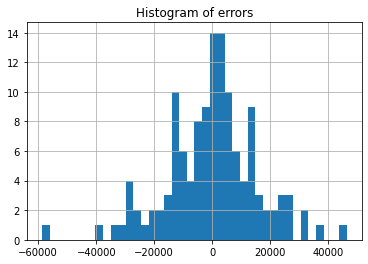

In [18]:
import matplotlib.pyplot as plt

IVs = ['x0', 'x1', 'x5', 'x6', 'x8', 'pca1']

# create train / test split using dataframe
x_train, x_test, y_train, y_test = train_test_split(df2.loc[:, IVs], df2.loc[:, 'y'], test_size=0.25, random_state=13)

# try both linear and polynomial of different degrees
linear_model = LinearRegression(normalize=True)

# now do estimation of models
lin_1 = linear_model.fit(x_train, y_train)

# ok, check first ten observations of predictions, y_test, and errors to make sure nothing is wrong
print (lin1_predict[0:10])
print (y_test[0:10])

# this creates errors of y and y'
errors = (y_test - lin1_predict)
print()
print()
print (errors[0:10])

# do histogram -- choose reasonable bins parameter
errors.hist(bins = 40)
plt.title('Histogram of errors')


In [19]:
# just check that things make sense
print (len(lin_1.coef_))
print (len(p2_1.coef_))
print (len(p3_1.coef_))
print (lin_1.coef_)
print (lin_1.intercept_)
print (x_train.columns)


6
28
84
[ 2.52317969e-01  4.44402790e+00 -2.00688087e+03 -1.56112175e+02
 -9.63162596e+00 -1.83669692e+00]
163819.70739434665
Index(['x0', 'x1', 'x5', 'x6', 'x8', 'pca1'], dtype='object')


In [20]:

# one can do this w/ cross_val_score or kfold -- but this is easier
from sklearn.model_selection import cross_val_score

print(cross_val_score(linear_model, df2.loc[:, IVs], df2.loc[:, 'y'], cv=5))



[0.98829708 0.99031867 0.98946065 0.99160136 0.99391446]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

In [21]:
# find RMSE; y_true first then y_model
print ("linear train / test rmse: ", mean_squared_error(y_train, lin_1.predict(x_train))**(.5), " / ", mean_squared_error(y_test, lin1_predict)**(.5))
print ("poly degree 2 train / test rmse: ", mean_squared_error(y_train, p2_1.predict(p2_train))**(.5), " / ", mean_squared_error(y_test, p2_predict)**(.5))
print ("poly degree 3 train / test rmse: ", mean_squared_error(y_train, p3_1.predict(p3_train))**(.5), " / ", mean_squared_error(y_test, p3_predict)**(.5))

# also do R^2
print ("linear train / test r^2: ", r2_score(y_train, lin_1.predict(x_train)), " / ", r2_score(y_test, lin1_predict))
print ("poly degree 2 train / test r^2: ", r2_score(y_train, p2_1.predict(p2_train)), " / ", r2_score(y_test, p2_predict))
print ("poly degree 3 train / test r^2: ", r2_score(y_train, p3_1.predict(p3_train)), " / ", r2_score(y_test, p3_predict))

linear train / test rmse:  15293.818047282766  /  15702.23871329352
poly degree 2 train / test rmse:  459.6414498467199  /  683.8298801325353
poly degree 3 train / test rmse:  0.011811952448284814  /  0.01540624383809224
linear train / test r^2:  0.9912661983730524  /  0.9900007291093141
poly degree 2 train / test r^2:  0.9999921112197746  /  0.9999810355029193
poly degree 3 train / test r^2:  0.9999999999999948  /  0.9999999999999903


In [22]:
# now, look for large magnitude IVs -- note trick with get_features_names() to have columns from original data
for i in range(0, len(IVs)):
    print (IVs[i], ", ", (lin_1.coef_)[i])

x0 ,  0.25231796881258506
x1 ,  4.444027898302477
x5 ,  -2006.8808674570826
x6 ,  -156.11217496725698
x8 ,  -9.631625955461525
pca1 ,  -1.8366969212284576


In [23]:
# now, look for large magnitude IVs -- note trick with get_features_names() to have columns from original data
for i in range(0, len(p2_features.get_feature_names())):
    print (p2_features.get_feature_names(x_train.columns)[i], ", ", (p2_1.coef_)[i])

1 ,  1.770665668773321e+17
x0 ,  -70.15454554685627
x1 ,  679.793587286515
x5 ,  2180.660769705725
x6 ,  310.5792749369931
x8 ,  -157.07406226583083
pca1 ,  5.990281931997503
x0^2 ,  -0.0013142544454179607
x0 x1 ,  0.025772737014089057
x0 x5 ,  0.006669713471861077
x0 x6 ,  0.0034986070581210903
x0 x8 ,  -0.007076776950029621
x0 pca1 ,  0.00015350243237539037
x1^2 ,  -0.06099319567351464
x1 x5 ,  -0.026521772149281902
x1 x6 ,  -0.029576435098409487
x1 x8 ,  0.044503488773583316
x1 pca1 ,  0.0494422080254903
x5^2 ,  -0.00990855677170889
x5 x6 ,  -4.015969245277674
x5 x8 ,  0.004886408219769319
x5 pca1 ,  0.005980877752886879
x6^2 ,  -0.10946027387213367
x6 x8 ,  -0.022100340108417688
x6 pca1 ,  -0.005050662099191366
x8^2 ,  0.00137457467000463
x8 pca1 ,  0.0013142955738389564
pca1^2 ,  0.0005719505225441596


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
# now, look for large magnitude IVs -- note trick with get_features_names() to have columns from original data
for i in range(0, len(p3_features.get_feature_names())):
    print (p3_features.get_feature_names(x_train.columns)[i], ", ", (p3_1.coef_)[i])

1 ,  -3.0634781795620137e-07
x0 ,  2.51019424501892
x1 ,  -4.113039964022143
x5 ,  -0.6835408653592757
x6 ,  -2.919782965561549
x8 ,  -1.650763918378653
pca1 ,  3.142396909889968
x0^2 ,  9.541413188488942e-05
x0 x1 ,  -0.00031568168609232244
x0 x5 ,  -5.326564104930308e-05
x0 x6 ,  -0.0002053801793156603
x0 x8 ,  -0.00012664674926240086
x0 pca1 ,  0.00026309150533286943
x1^2 ,  0.0007673632575650222
x1 x5 ,  -0.00024223430944110425
x1 x6 ,  0.00033859939118746125
x1 x8 ,  0.0003477031199003027
x1 pca1 ,  0.0002691429690289481
x5^2 ,  -1.7814513046333376e-05
x5 x6 ,  1.5351066127689813e-05
x5 x8 ,  9.331121245497903e-05
x5 pca1 ,  0.0002151746629031189
x6^2 ,  0.0003409587839990664
x6 x8 ,  0.00011092878480172589
x6 pca1 ,  0.00027155290651742514
x8^2 ,  -3.0823429478603966e-05
x8 pca1 ,  0.0002491527108573692
pca1^2 ,  0.0004792271537113997
x0^3 ,  1.214756738405503e-09
x0^2 x1 ,  -6.056221307174838e-09
x0^2 x5 ,  -1.06409613579718e-09
x0^2 x6 ,  -3.5604375898469004e-09
x0^2 x8 ,  -2.4

In [25]:
# lots of variables, but many are small -- time to use regularized regression to get rid of some
# try lasso and test different penalties
lambdas = (.1, .5, 1, 2.5, 5, 7.5, 10, 20, 50, 100, 200)

for i in lambdas:    
    lasso_reg = Lasso(alpha = i, max_iter=10000)
    lasso1 = lasso_reg.fit(p3_train, y_train)
    lasso1_predict = lasso1.predict(p3_test)
    print (mean_squared_error(y_test, lasso1_predict)**(.5))

345.6387561195419
345.67557594564704
345.7199922013728
345.75448435957185
345.6970826712076
345.89539968834
346.23011029795526
348.782253056236
364.92352221187775
394.3724836810924
373.19956707492514


In [26]:
# ok, go for higher value of lambda given the above
lasso_reg = Lasso(alpha = 5, max_iter=10000)
lasso1 = lasso_reg.fit(p3_train, y_train)
lasso1_predict = lasso1.predict(p3_test)
print (mean_squared_error(y_test, lasso1_predict)**(.5))


345.6970826712076


In [27]:
# now, look for large magnitude IVs -- note trick with get_features_names() to have columns from original data
for i in range(0, len(p3_features.get_feature_names())):
    print (p3_features.get_feature_names(x_train.columns)[i], ", ", (lasso1.coef_)[i])

1 ,  0.0
x0 ,  7.233384834691988
x1 ,  -0.0
x5 ,  71.33895454355579
x6 ,  22.711273339459417
x8 ,  -3.968088413824313
pca1 ,  0.0
x0^2 ,  -0.0002003672674880605
x0 x1 ,  -0.0018792893905550628
x0 x5 ,  0.0012953938250616485
x0 x6 ,  -0.00029893337718597395
x0 x8 ,  2.546933870378808e-05
x0 pca1 ,  0.0002478776008691711
x1^2 ,  -0.028747620666641736
x1 x5 ,  0.10619887692966572
x1 x6 ,  0.029573525260661142
x1 x8 ,  -0.10758358631311082
x1 pca1 ,  0.1995503115574456
x5^2 ,  -0.005390309090409438
x5 x6 ,  -0.9903897834563377
x5 x8 ,  0.07231834607847037
x5 pca1 ,  0.2467588400429937
x6^2 ,  -0.027250239106266946
x6 x8 ,  -0.0013882590938550693
x6 pca1 ,  -0.017936677223243176
x8^2 ,  -0.02210045625261302
x8 pca1 ,  -0.15916257119025173
pca1^2 ,  0.22175774055090983
x0^3 ,  -5.66046838534339e-09
x0^2 x1 ,  -2.1521673497765168e-07
x0^2 x5 ,  1.5020355905479318e-06
x0^2 x6 ,  1.299866595680704e-07
x0^2 x8 ,  2.4030208946976903e-08
x0^2 pca1 ,  5.319544023779717e-09
x0 x1^2 ,  -3.89463951584

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
# from the above, clear that x5, x6 are the largest IV's, followed by x0 and x8; pca1 has a modest effect, some interaction of x5*x6, x7^2, and that's about it.  
# So rerun with those and call it a day.  
# one issue: the above only has 2nd order polys / interactions, but the above results show that the degree 3 poly did better OOS
# either I've missed a term, or there's a bug somewhere above -- that said, this isn't quite enough data to get stable results
# if one changes the random number seed or the proportion or train / test, things change more than I'd like